# HOUSE PRICE PREDICTOR


## Importing Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv('housing.csv')
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Information About Data

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
dataframe.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


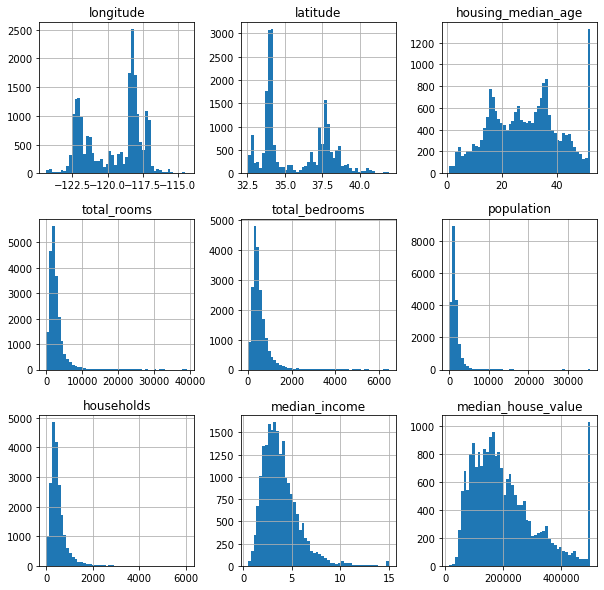

In [6]:
dataframe.hist(bins=50,figsize=(10,10))
plt.show()

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataframe,test_size=0.2,random_state=42)
# We create 2 different data frame, one of them for test and another one for train our model.
print('train_set shape is : {}'.format(train_set.shape))
print('test_set shape is : {}'.format(test_set.shape))

train_set shape is : (16512, 10)
test_set shape is : (4128, 10)


#### Copying Train Set

In [8]:
train_set_cp = train_set.copy()

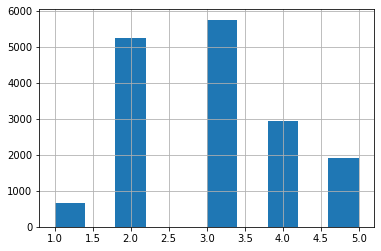

In [9]:
income=pd.cut(train_set.median_income,bins=[0.,1.5,3.,4.5,6.,np.inf],labels=[1,2,3,4,5])
income.hist()
plt.show()

## Data Visulation and Exploration

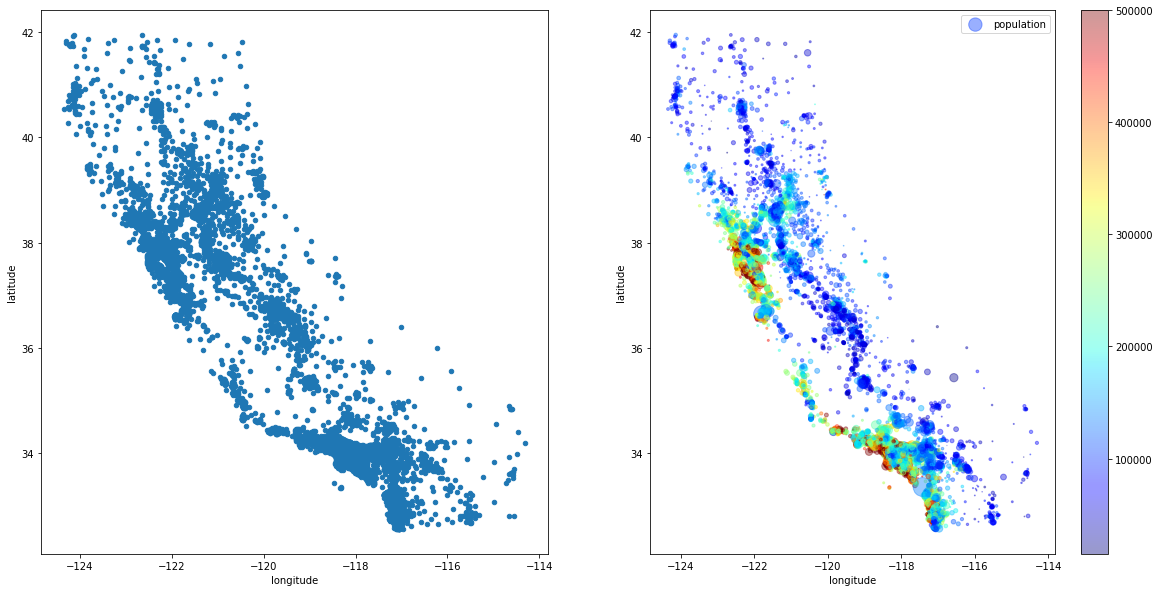

In [10]:
fig, axarr = plt.subplots(1, 2,figsize=(20,10))
train_set.plot(kind='scatter',x='longitude',y='latitude',ax=axarr[0])
train_set.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=train_set['population']/100,label='population',c=train_set.median_house_value,cmap=plt.get_cmap('jet'),colorbar=True,ax=axarr[1])
plt.legend()

## Correlation

**California Maps**
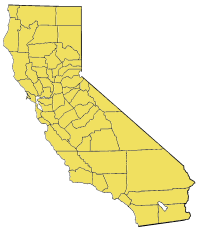 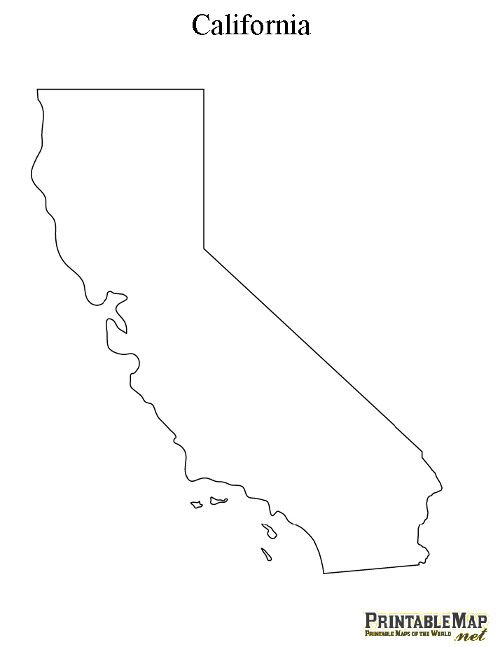

In [11]:
# We will look correlation between numerical variables.
train_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


<AxesSubplot:>

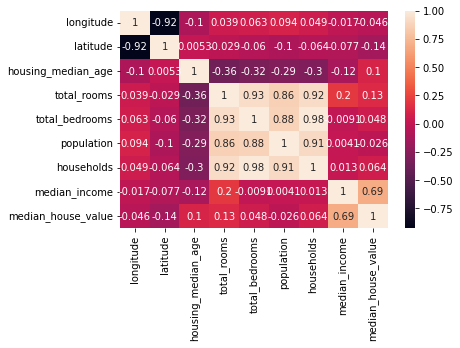

In [12]:
sns.heatmap(train_set.corr(),annot=True)

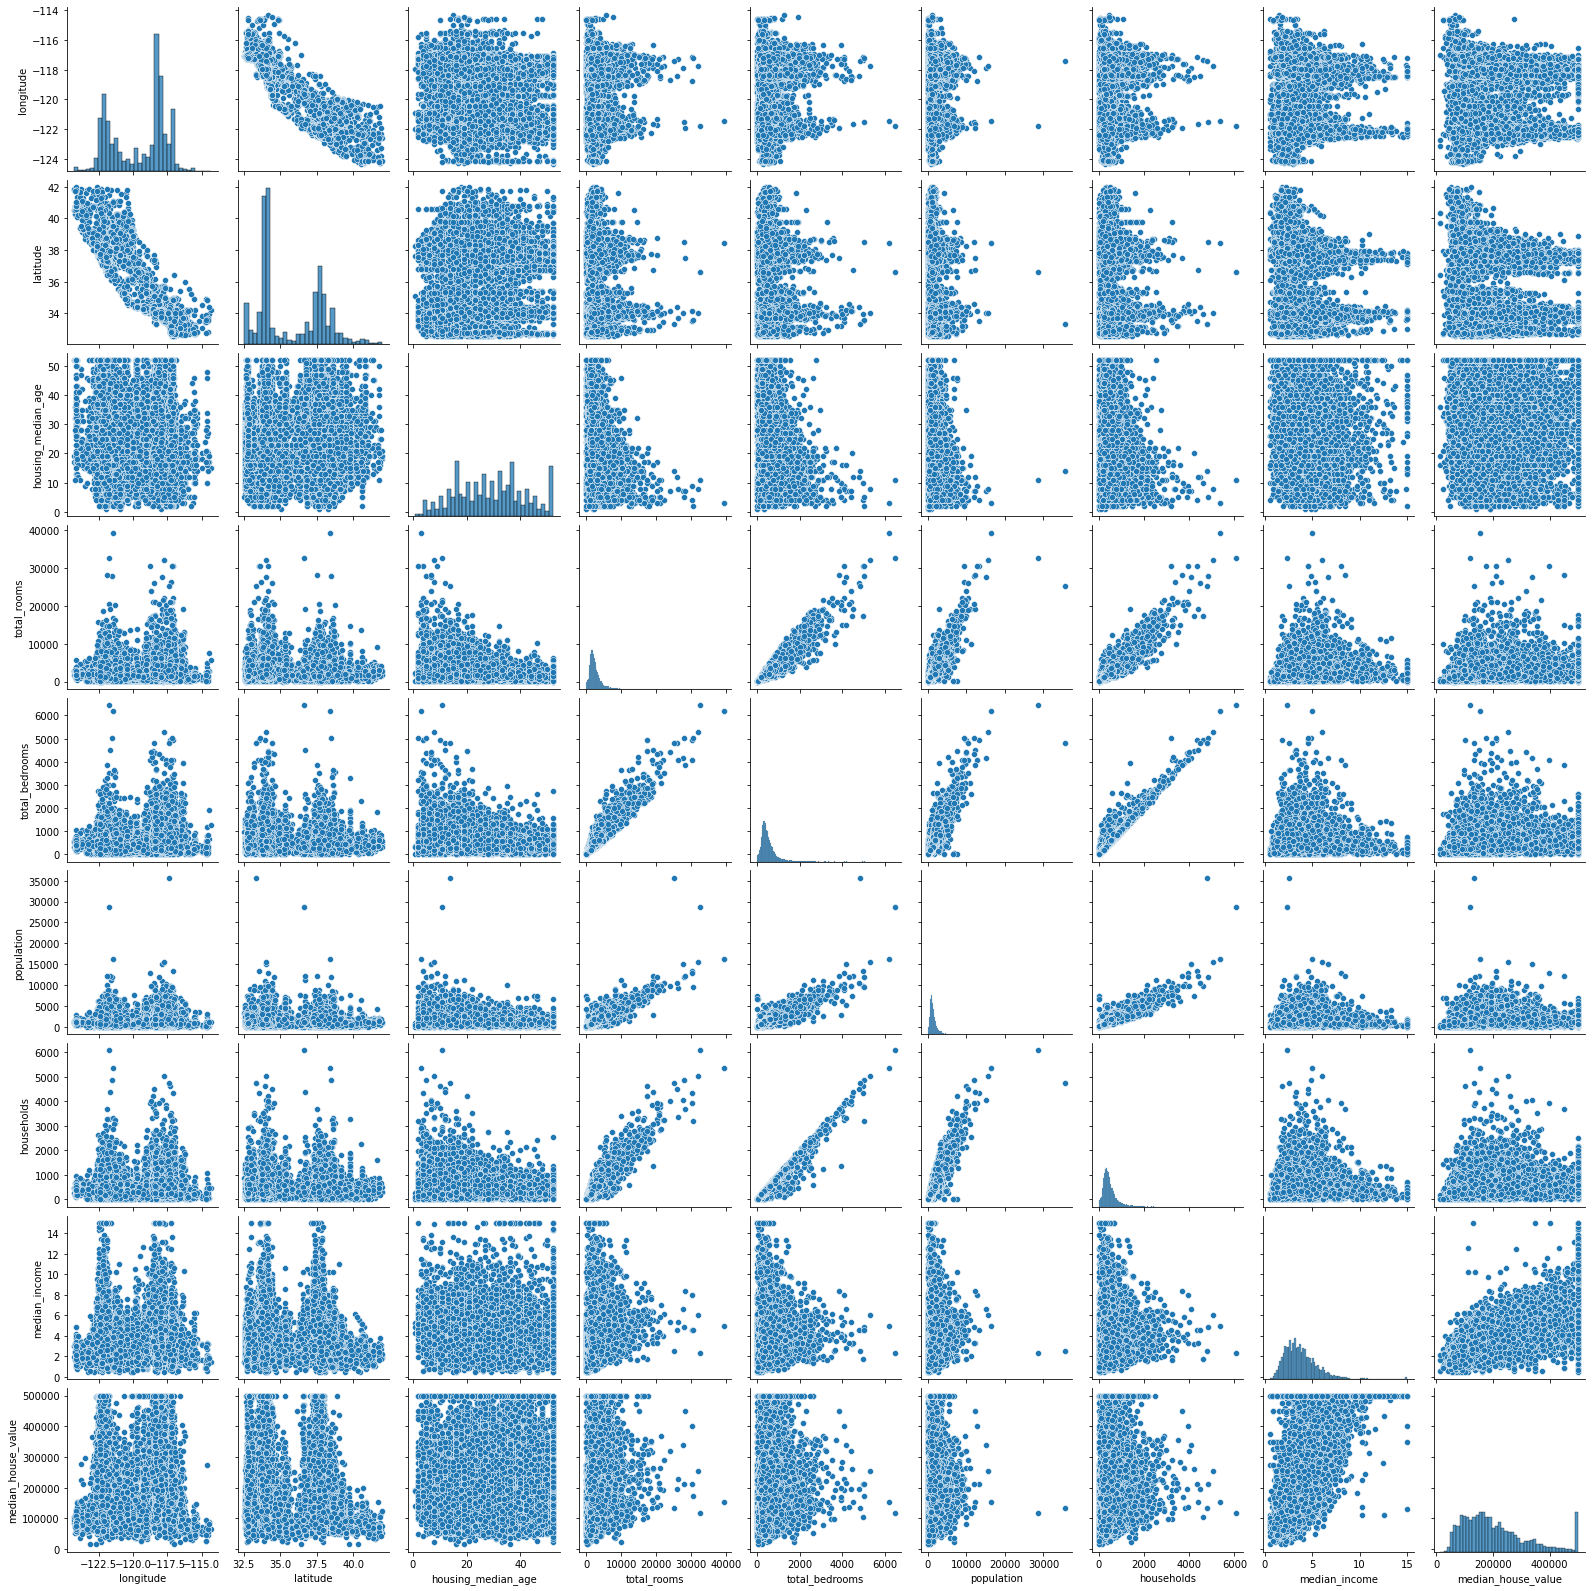

In [13]:
# Lets draw some plot
sns.pairplot(train_set)

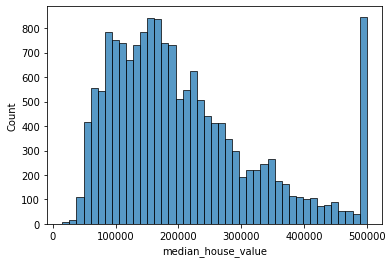

In [14]:
sns.histplot(train_set['median_house_value'])
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

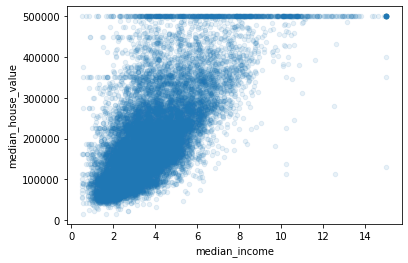

In [15]:
train_set.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

## Trying Out Different attributes combination

In [16]:
# Now we can create new features from our data and compare them with other features.

train_set['rooms_per_household']=train_set['total_rooms']/train_set['households']
train_set['bedrooms_per_room']=train_set['total_bedrooms']/train_set['total_rooms']
train_set['population_per_household']=train_set['population']/train_set['households']
corr_matrix=train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

## Prepare Data For ML

In [17]:
# Firstly we will seperate train data and label.
housing=train_set_cp.drop('median_house_value',axis=1)           # drop y label
housing_labels=train_set_cp['median_house_value'].copy()         # copy data

In [18]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
housing_num=housing.drop('ocean_proximity',axis=1)   #droping ocean proximity because theye are not numeric values
X=imputer.fit_transform(housing_num)

In [19]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.sort_index()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200
...,...,...,...,...,...,...,...,...
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000


In [20]:
housing_cat=housing[['ocean_proximity']]

#### One Hot Encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
print(type(housing_cat_1hot))
housing_cat_1hot

<class 'scipy.sparse.csr.csr_matrix'>


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [22]:
housing_cat_1hot.toarray()


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [23]:
type(housing_cat_1hot.toarray())

numpy.ndarray

In [24]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [25]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6
class CombinedAttiributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder=CombinedAttiributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)
housing_extra_attribs[0]

array([-117.03, 32.71, 33.0, 3126.0, 627.0, 2300.0, 623.0, 3.2596,
       'NEAR OCEAN', 5.017656500802568, 3.691813804173355], dtype=object)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttiributesAdder()),
    ('std_scaler',StandardScaler())])
num_pipeline.fit_transform(housing_num)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
         0.05137609, -0.2117846 ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
        -0.11736222,  0.34218528],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.03227969, -0.66165785],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.02030568,  0.99951387],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
         0.00707608, -0.79086209],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
        -0.08535429,  1.69520292]])

In [27]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)

In [28]:
df33=pd.DataFrame(housing_prepared)
df33

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.603337,-0.805492,-0.675847,-0.742833,1.307215,0.290620,-0.005588,-1.064430,1.0,0.0,0.0,0.0,0.0
16508,1.073144,-0.759688,0.348490,0.203255,0.075188,0.287195,-0.133839,-0.436266,0.600411,0.069722,-0.483382,0.0,1.0,0.0,0.0,0.0
16509,0.599469,-0.755007,0.586545,-0.248786,0.072801,0.289833,0.070909,-0.496973,-0.606759,0.020306,0.999514,1.0,0.0,0.0,0.0,0.0
16510,-1.185540,0.906510,-1.079841,0.429046,0.139628,0.308303,0.154908,0.965450,0.402175,0.007076,-0.790862,1.0,0.0,0.0,0.0,0.0


## Model Training

In [29]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)

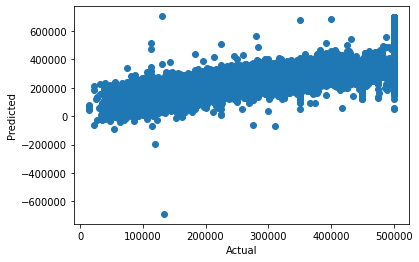

In [30]:
plt.scatter(housing_labels,housing_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [31]:
# Test with some data
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_preapared=full_pipeline.transform(some_data)
print('predictions=',lin_reg.predict(some_data_preapared))
print('labels=',list(some_labels))


predictions= [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]
labels= [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [32]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

67593.20745775253

In [33]:
#Lets try Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

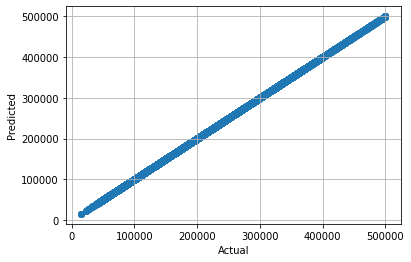

In [34]:
plt.scatter(housing_labels,housing_predictions)
plt.grid()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [35]:
# Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)
def display_scores(scores):
    print('scores',scores)
    print('mean',scores.mean())    
    print('std deviation',scores.std())
display_scores(tree_rmse_scores)

scores [64946.06192341 70722.24705919 68131.64103614 69251.6543272
 73989.92424272 65746.23460542 67239.47242598 68025.35642638
 67695.07711658 68907.88719669]
mean 68465.55563597102
std deviation 2420.922291102637


In [51]:
#Lets try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
forrest_reg=RandomForestRegressor()
forrest_reg.fit(housing_prepared,housing_labels)
housing_predictions=forrest_reg.predict(housing_prepared)
forrest_mse=mean_squared_error(housing_labels,housing_predictions)
forrest_rmse=np.sqrt(forrest_mse)
forrest_rmse

18535.1081373688

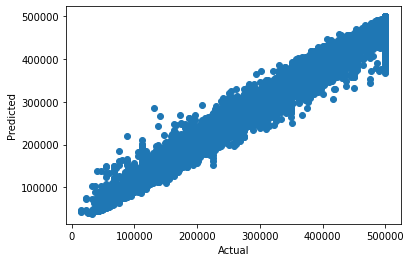

In [37]:
plt.scatter(housing_labels,housing_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [38]:
scores=cross_val_score(forrest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forrest_rmse_scores=np.sqrt(-scores)
display_scores(forrest_rmse_scores)

scores [47031.30960536 51380.87759905 49704.37324764 52137.50728347
 52458.25503806 47118.43251438 47509.31427888 50814.85902127
 49567.96425098 49951.1650129 ]
mean 49767.40578519793
std deviation 1903.6353856614353


Better than other, lets tune our model.

## Tunnig

Lets get best parameters in random forrest algorithm

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,5,6,8]},
            {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
forrest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forrest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [40]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63673.106066489134 {'max_features': 2, 'n_estimators': 3}
55021.59599768467 {'max_features': 2, 'n_estimators': 10}
52309.295614865456 {'max_features': 2, 'n_estimators': 30}
59444.48817608096 {'max_features': 4, 'n_estimators': 3}
52496.48599262663 {'max_features': 4, 'n_estimators': 10}
50095.83821825177 {'max_features': 4, 'n_estimators': 30}
59475.7186882133 {'max_features': 5, 'n_estimators': 3}
52453.10310145798 {'max_features': 5, 'n_estimators': 10}
49993.33221727344 {'max_features': 5, 'n_estimators': 30}
58910.20714629952 {'max_features': 6, 'n_estimators': 3}
52237.957848390375 {'max_features': 6, 'n_estimators': 10}
49874.69734777331 {'max_features': 6, 'n_estimators': 30}
58840.670414020504 {'max_features': 8, 'n_estimators': 3}
52095.23317919557 {'max_features': 8, 'n_estimators': 10}
49959.953827904734 {'max_features': 8, 'n_estimators': 30}
63355.90836994914 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53943.17307994431 {'bootstrap': False, 'max_features':

In [41]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([8.04707099e-02, 6.59629051e-02, 4.13583188e-02, 1.69200515e-02,
       1.69699559e-02, 1.70335708e-02, 1.58631809e-02, 3.39254530e-01,
       4.34634812e-02, 1.10590699e-01, 9.43551915e-02, 1.37728539e-02,
       1.34827990e-01, 1.64380341e-04, 3.73053681e-03, 5.26164471e-03])

In [42]:
# Lets get names
extra_attribs=['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3392545297117252, 'median_income'),
 (0.13482799009971658, 'INLAND'),
 (0.11059069884038962, 'pop_per_hhold'),
 (0.09435519152360644, 'bedrooms_per_room'),
 (0.08047070989766539, 'longitude'),
 (0.0659629051067077, 'latitude'),
 (0.04346348124228036, 'rooms_per_hhold'),
 (0.04135831879532422, 'housing_median_age'),
 (0.017033570782100344, 'population'),
 (0.016969955854715748, 'total_bedrooms'),
 (0.01692005151242829, 'total_rooms'),
 (0.015863180885185183, 'households'),
 (0.013772853890152507, '<1H OCEAN'),
 (0.005261644708017156, 'NEAR OCEAN'),
 (0.003730536808981931, 'NEAR BAY'),
 (0.0001643803410033777, 'ISLAND')]

## Fit Test Data

In [43]:
final_model=grid_search.best_estimator_
X_test=test_set.drop('median_house_value',axis=1)
y_test=test_set['median_house_value'].copy()
X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [44]:
X_test_prepared[0]

array([ 0.28534728,  0.1951    , -0.28632369, -0.52286157, -0.24223915,
       -0.03030109, -0.37008673, -1.15508475, -0.52068576,  0.06740798,
        1.33648242,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [45]:
feature = np.array([[0.28534728,0.1951, -0.28632369, -0.52286157, -0.24223915,
            -0.03030109, -0.37008673, -1.15508475, -0.52068576,  0.06740798,
            1.33648242, 0.,  1., 0., 0., 0.]], dtype="float64")

### Saving the model

In [46]:
from joblib import dump
dump(final_model,'D:/housing.joblib')

['D:/housing.joblib']

### Using the model

In [47]:
from joblib import load
model = load('D:/housing.joblib')

In [48]:
model.predict(feature)

array([48596.66666667])

In [49]:
np.array(y_test)[0]

47700.0